<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Reproduction_figure_6_for_Wenlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
figure_6B_file_path = '/content/drive/My Drive/WenLab/Figure 6-source data for Figure 6B.xlsx'
df_6B_sum = pd.read_excel(figure_6B_file_path, header = 2)
df_6B_sum.head(10)
df_6B_optic_ctr=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='AIB  ChR2')
df_6B_optic_Arch=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='AIB  ChR2;Plim-4  Arch')
df_6B_thermo_ctr=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='Thermal stimulus')
df_6B_thermo_ventral=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='Thermal stimulus;RIV Arch')
df_6B_thermo_head=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='Thermal stimulus;Plim-4 Arch')
print(df_6B_sum.columns)
df_6B_sum.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['worm name', 'reversal length', 'sem', 'p-value U-test',
       'multi p-value', 'sig', 'Unnamed: 6', 'n', 'turn num', 'turn rate',
       'turn p-value', 'multi', 'Unnamed: 12', 'Unnamed: 13',
       'experimental condition'],
      dtype='object')


,worm name,reversal length,sem,p-value U-test,multi p-value,sig,Unnamed: 6,n,turn num,turn rate,turn p-value,multi,Unnamed: 12,Unnamed: 13,experimental condition
0,AIB::ChR2,3.60360,0.29881,NaN,NaN,NaN,NaN,49.0,39.0,0.795918,NaN,NaN,NaN,NaN,1.5s blue laser 1.5
1,WEN0843(QW1097_quan0199),6.61060,0.44999,1.109000e-05,3.327000e-05,****,NaN,73.0,48.0,0.657534,0.097589,ns,NaN,20190424,1.5s blue laser 1.61 +12s green laser 2.59
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p value,multi,no turn num,no response,NaN
4,ctr,2.45107,0.06847,NaN,NaN,NaN,NaN,385.0,192.0,0.498701,NaN,NaN,193,NaN,NaN
5,ventral(RIV SAAV) ARCH QW889,3.58069,0.24348,1.131100e-06,3.393300e-06,****,NaN,61.0,14.0,0.229508,0.000089,0.000268,47,NaN,NaN
6,head(RIV SAAD SAAV SMB) ARCH QW889,5.87383,0.38647,9.115700e-22,2.734710e-21,****,NaN,86.0,18.0,0.209302,0.000005,0.000016,63,5,NaN


In [50]:
####这里的处理代码基本上与figure5F、figure3D的一致
try:
    optic_data = df_6B_sum[df_6B_sum['worm name'].str.contains("AIB::ChR2", na=False)].iloc[0]
    optic_Arch_data = df_6B_sum[df_6B_sum['worm name'].str.contains("WEN0843", na=False)].iloc[0]
    thermo_ctrldata = df_6B_sum[df_6B_sum['worm name'].str.contains("ctr", na=False)].iloc[0]
    thermo_ventral_data = df_6B_sum[df_6B_sum['worm name'].str.contains("ventral", na=False)].iloc[0]
    thermo_head_data = df_6B_sum[df_6B_sum['worm name'].str.contains("head", na=False)].iloc[0]

    # 提取概率 (条形图高度)
    reversal_length = [optic_data['reversal length'], optic_Arch_data['reversal length'], thermo_ctrldata['reversal length'],thermo_ventral_data['reversal length'],thermo_head_data['reversal length']]
    lower_limit_col_name = 'sem'
    upper_limit_col_name = 'sem'

    lower_limits = [optic_data[lower_limit_col_name], optic_Arch_data[lower_limit_col_name], thermo_ctrldata[lower_limit_col_name],thermo_ventral_data[lower_limit_col_name],thermo_head_data[lower_limit_col_name]]
    upper_limits = [optic_data[upper_limit_col_name], optic_Arch_data[upper_limit_col_name], thermo_ctrldata[upper_limit_col_name],thermo_ventral_data[upper_limit_col_name],thermo_head_data[upper_limit_col_name]]
    #统计turn的数量与no turn的数量
    n_trials = [optic_data['n'], optic_Arch_data['n'], thermo_ctrldata['n'], thermo_ventral_data['n'], thermo_head_data['n']]
    turn_numbers = [optic_data['turn num'], optic_Arch_data['turn num'], thermo_ctrldata['turn num'], thermo_ventral_data['turn num'], thermo_head_data['turn num']]
    # 计算误差棒长度 (确保为正数)
    lower_errors = np.abs(np.array(lower_limits))
    upper_errors = np.abs(np.array(upper_limits))
    # plt.bar 的 yerr 参数需要 [下误差, 上误差]
    errors = [lower_errors, upper_errors]

    # 准备标签
    labels = ['AIB::ChR2', 'AIB::ChR2\nPlim4::Arch', 'thermal stimulus','Thermal stimulus\nRIV::Arch','Thermal stimulus\nPlim4::Arch']
    print("  reversal length", reversal_length)
    print("  Errors (lower, upper):", errors)
except (KeyError, IndexError) as e:
    print(f"步骤 1/2: 数据提取失败！请检查 Summary Sheet 的内容和列名是否正确。错误: {e}")
    # 如果提取失败，停止执行
    raise e

  reversal length [np.float64(3.6036), np.float64(6.6106), np.float64(2.45107), np.float64(3.58069), np.float64(5.87383)]
  Errors (lower, upper): [array([0.29881, 0.44999, 0.06847, 0.24348, 0.38647]), array([0.29881, 0.44999, 0.06847, 0.24348, 0.38647])]


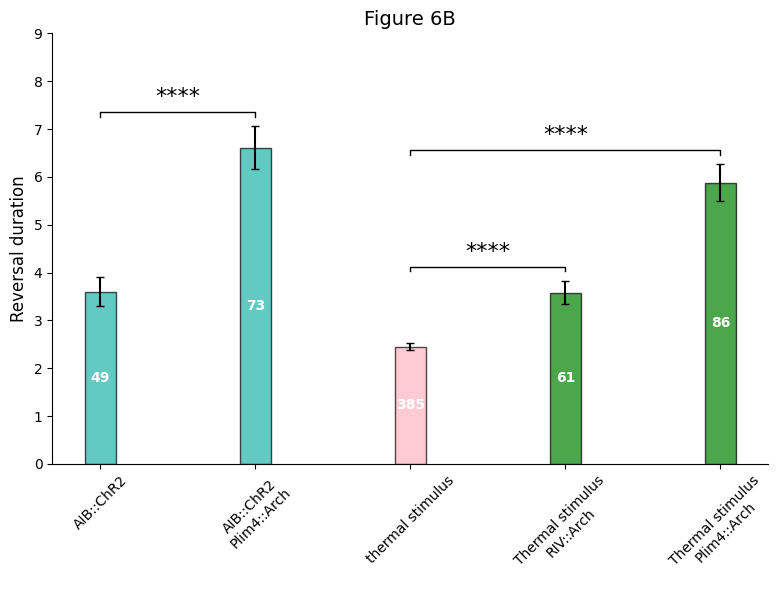

In [51]:
##绘制图形
#  2. 绘制条形图
plt.figure(figsize=(8, 6))

# 设置条形图颜色 (对应 Fig 3D: 绿, 红, 蓝)
colors = ['lightseagreen','lightseagreen','lightpink', 'green', 'green']
# 条形图的 X 轴位置
x_pos = np.arange(len(labels))


# 绘制条形图，并传入计算好的误差
plt.bar(x_pos, reversal_length, yerr=errors, capsize=3, color=colors, alpha=0.7, edgecolor='black',width=0.2)

# 添加文本标签 (在条形图内部显示 n)
# 从之前提取的数据中获取 n
n = [optic_data['n'], optic_Arch_data['n'], thermo_ctrldata['n'],thermo_ventral_data['n'],thermo_head_data['n']]
turn_rate = [optic_data['turn rate'], optic_Arch_data['turn rate'], thermo_ctrldata['turn rate'],thermo_ventral_data['turn rate'],thermo_head_data['turn rate']]
for i in range(len(labels)):
    # 将数字转为整数再格式化
    plt.text(x_pos[i], reversal_length[i] * 0.5, f'{int(n[i])}',
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

def add_significance_bracket(x1, x2, y_start, text):
    """辅助函数，用于绘制显著性标记线和文本"""
    line_y = y_start + 0.1 # 标记线的高度，比y_start稍高
    text_y = line_y + 0.1  # 星号文本的高度
    # 绘制水平线
    plt.plot([x1, x1, x2, x2], [y_start, line_y, line_y, y_start], lw=1.0, c='black')
    # 添加星号文本
    plt.text((x2+x1)*0.5, text_y, text, ha='center', va='bottom', fontsize=16)

# a) 比较 optic (x=0) vs optic ARCH抑制组(x=1)
p_val_optic = optic_Arch_data.get('multi p-value', 1.0) # 使用 .get 防止 multi p-value 列不存在时报错
if pd.notna(p_val_optic) and p_val_optic < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[0]+upper_limits[0], reversal_length[1]+upper_limits[1])
    add_significance_bracket(x_pos[0], x_pos[1], y_max + 0.2, '****')

# b) 比较 Thermal ctr (x=2) vs Thermal ventral (x=3)
p_val_Thermal1 = thermo_ventral_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal1) and p_val_Thermal1 < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[3] + upper_limits[3])
    # 注意：为了避免标记线重叠，第二条线需要画得更高一点
    add_significance_bracket(x_pos[2], x_pos[3], y_max + 0.2, '****')
# c) 比较 Thermal ctr (x=2) vs Thermal head (x=4)
p_val_Thermal2 = thermo_head_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal2) and p_val_Thermal2 < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[4] + upper_limits[4])
    # 注意：为了避免标记线重叠，第二条线需要画得更高一点
    add_significance_bracket(x_pos[2], x_pos[4], y_max + 0.2, '****')

#  美化图表
plt.ylabel('Reversal duration', fontsize=12)
plt.xticks(x_pos, labels, fontsize=10, rotation=45) # X 轴标签
plt.ylim(0, 9) # Y 轴范围，留出上方空间给星号
plt.title('Figure 6B', fontsize=14)
plt.grid(False) # 关闭背景网格
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(w_pad=0.1)# 调整布局防止标签重叠
plt.show()


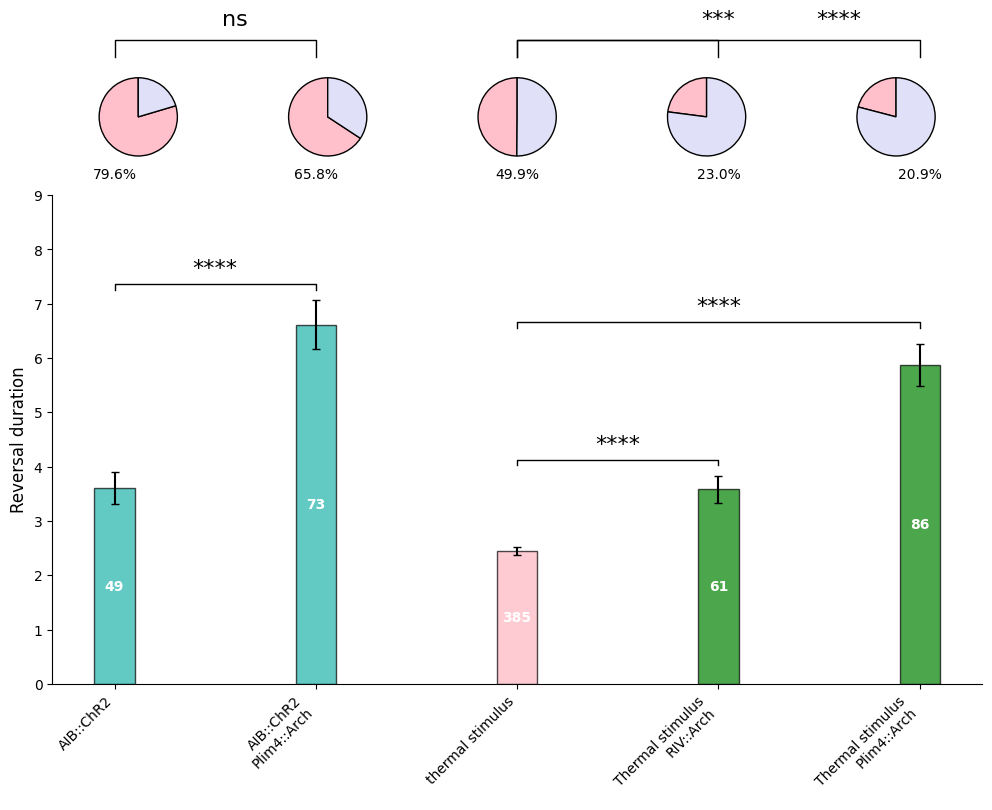

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

## 绘制图形 (合并柱状图和饼图)

# 1. 创建一个Figure和GridSpec (2行5列)
fig = plt.figure(figsize=(12, 8))
# height_ratios 让柱状图更高
# hspace 调整柱状图和饼图的垂直间距
gs = gridspec.GridSpec(
    2, 5,
    height_ratios=[1, 5],
    wspace=0.1,
    hspace=0.1
)

# 2. 【柱状图】(上层, 跨5列),与上面的代码一样
ax_bar = plt.subplot(gs[1, :])


# 所有 'plt.' 都改成了 'ax_bar.'

colors = ['lightseagreen','lightseagreen','lightpink', 'green', 'green']
x_pos = np.arange(len(labels))

# 绘制条形图，并传入计算好的误差
ax_bar.bar(x_pos, reversal_length, yerr=errors, capsize=3, color=colors, alpha=0.7, edgecolor='black',width=0.2)

# 添加文本标签 (在条形图内部显示 n)
# (我们使用 Cell 2 中提取的 n_trials)
for i in range(len(labels)):
    ax_bar.text(x_pos[i], reversal_length[i] * 0.5, f'{int(n_trials[i])}',
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')


def add_significance_bracket(ax, x1, x2, y_start, text):
    """辅助函数，用于绘制显著性标记线和文本"""
    line_y = y_start + 0.1 # 标记线的高度，比y_start稍高
    text_y = line_y + 0.1  # 星号文本的高度
    # 绘制水平线
    ax.plot([x1, x1, x2, x2], [y_start, line_y, line_y, y_start], lw=1.0, c='black')
    # 添加星号文本
    ax.text((x2+x1)*0.5, text_y, text, ha='center', va='bottom', fontsize=16)

# a) 比较 optic (x=0) vs optic ARCH抑制组(x=1)
p_val_optic = optic_Arch_data.get('multi p-value', 1.0)
if pd.notna(p_val_optic) and p_val_optic < 0.0001:
    y_max = max(reversal_length[0]+upper_limits[0], reversal_length[1]+upper_limits[1])
    #  传入 ax_bar
    add_significance_bracket(ax_bar, x_pos[0], x_pos[1], y_max + 0.2, '****')

# b) 比较 Thermal ctr (x=2) vs Thermal ventral (x=3)
p_val_Thermal1 = thermo_ventral_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal1) and p_val_Thermal1 < 0.0001:
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[3] + upper_limits[3])
    #  传入 ax_bar
    add_significance_bracket(ax_bar, x_pos[2], x_pos[3], y_max + 0.2, '****')

# c) 比较 Thermal ctr (x=2) vs Thermal head (x=4)
p_val_Thermal2 = thermo_head_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal2) and p_val_Thermal2 < 0.0001:
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[4] + upper_limits[4])
    #  传入 ax_bar, 并调高一点y值避免重叠
    add_significance_bracket(ax_bar, x_pos[2], x_pos[4], y_max + 0.3, '****')

#  美化图表
ax_bar.set_ylabel('Reversal duration', fontsize=12)
ax_bar.set_xticks(x_pos) # X 轴标签
ax_bar.set_xticklabels(labels, fontsize=10, rotation=45, ha='right') # 调整了旋转和对齐
ax_bar.set_ylim(0, 9) # Y 轴范围
ax_bar.grid(False) # 关闭背景网格
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)


# 饼图
pie_colors = ['pink','#E0E0F8']

for i in range(len(labels)):
    # 为这个饼图创建一个子图 (axes)
    # gs[1, i] 表示 “第1行，第i列”
    ax_pie = plt.subplot(gs[0, i])

    # 从 Cell 2 提取的列表中获取数据
    n_total = n_trials[i]
    n_turn = turn_numbers[i]
    n_no_turn = n_total - n_turn
    pie_wedges = []
    # 饼图的数据
    pie_slices = [n_turn, n_no_turn]

    if n_total == 0:
        pie_slices = [0, 1] # 避免除零错误

    wedges, texts=ax_pie.pie(
        pie_slices,
        colors=pie_colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    ax_pie.set_aspect('equal')
if i == 0:
   pie_wedges = wedges
###绘制显著性分析线与turn rate以及图例
#p_val_omega_optic = float(optic_Arch_data.get('multi', 1.0)) # 假设有这个列
p_val_omega_thermal1 = float(thermo_ventral_data.get('multi', 1.0))
p_val_omega_thermal2 = float(thermo_head_data.get('multi', 1.0))
def add_significance_bracket_pie(ax, x1, x2, y_offset, text):
    """为饼图绘制显著性标记线和文本"""
    line_y = ax_pie.get_ylim()[1] - 0.5 + y_offset # 调整Y轴位置，让它高于饼图但低于柱状图X轴
    text_y = line_y + 0.1
    x1_center = x_pos[x1]
    x2_center = x_pos[x2]
    y_sig_line = -0.5
    y_sig_level = ax_pie.get_ylim()[1] - 0.7 # 这是一个经验值，需要调整

    ax_bar.plot([x_pos[x1], x_pos[x1], x_pos[x2], x_pos[x2]],
                [y_sig_level+11, y_sig_level + 11.3, y_sig_level + 11.3, y_sig_level+11],
                lw=1.0, c='black', clip_on=False) # clip_on=False 允许在轴外绘制
    ax_bar.text((x_pos[x1]+x_pos[x2])*0.6, y_sig_level + 11.5, text,
                ha='center', va='bottom', fontsize=16, clip_on=False)
# 比较 0 和 1 号饼图
add_significance_bracket_pie(ax_bar, 0, 1, 0, 'ns')

# 比较 2 和 3 号饼图
if pd.notna(p_val_omega_thermal1) and p_val_omega_thermal1 < 0.0001:
    add_significance_bracket_pie(ax_bar, 2, 3, 0.1, '****') # y_offset 稍高一点避免重叠
elif pd.notna(p_val_omega_thermal1) and p_val_omega_thermal1 < 0.001:
    add_significance_bracket_pie(ax_bar, 2, 3, 0.1, '***')

# 比较 2 和 4 号饼图
if pd.notna(p_val_omega_thermal2) and p_val_omega_thermal2 < 0.0001:
    add_significance_bracket_pie(ax_bar, 2, 4, 0.1, '****')



turnrate_per = [f"{i:.1%}" for i in turn_rate]   #将turn rate转化为百分数
y_lim_array = np.ones_like(len(labels)) * ax_pie.get_ylim()[1]
for i in range(len(turn_rate)):
    ax_bar.text(x_pos[i],y_lim_array*7.5, f'{turnrate_per[i]}',
             ha='center', va='center', color='black', fontsize=10,clip_on=False)

plt.show()

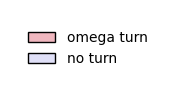

In [53]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

pie_colors_map = {
    'omega turn': '#F0B7BF',
    'no turn': '#E0E0F8'
}

# 2. 创建图例的 "代理" 图形元素
legend_elements = [
    Patch(facecolor=pie_colors_map['omega turn'], edgecolor='black', label='omega turn'),
    Patch(facecolor=pie_colors_map['no turn'], edgecolor='black', label='no turn')
]
fig, ax = plt.subplots(figsize=(2, 1))

ax.legend(handles=legend_elements, loc='center', frameon=False, fontsize=10)
ax.axis('off')

# 6. 保存图例
# 我们把它保存为一个单独的 PNG 文件
# transparent=True 会让背景变透明，这正是 P 图所需要的！
output_filename = "legend_only.png"
plt.savefig(
    output_filename,
    bbox_inches='tight',  # 裁剪掉周围多余的空白
    transparent=True      # !!! 让背景透明
)

In [54]:
###figure6C
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
figure_6C_up_file_path = '/content/drive/My Drive/WenLab/Figure 6-source data for Figure 6C_Upper.xlsx'
figure_6C_bottom_file_path = '/content/drive/My Drive/WenLab/Figure 6-source data for Figure 6C_Bottom.xlsx'
df_6C_up = pd.read_excel(figure_6C_up_file_path, header = 2)
df_6C_bottom = pd.read_excel(figure_6C_bottom_file_path, header = 2)
df_6C_up.head()
# df_6C_bottom.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,worm name,reversal duration_yaml,turn
0,20170630w1,8.564,0.0
1,NaN,2.341,0.0
2,NaN,8.783,0.0
3,W3,7.166,0.5
4,NaN,3.836,0.0


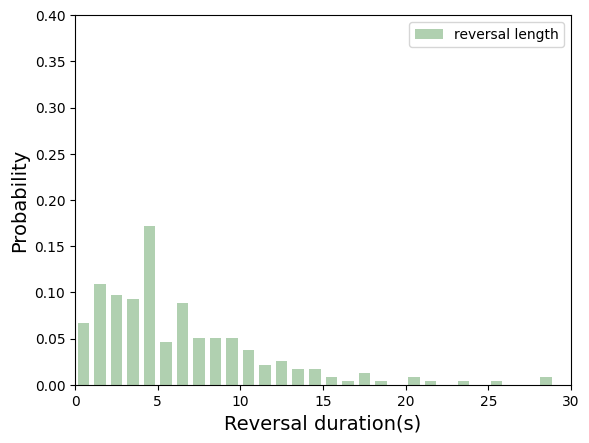

In [55]:
reversal_length =df_6C_up['reversal duration_yaml'].fillna(0)

# reversal_length_real = reversal_length.fillna()
bins = np.arange(0, 30, 1)
myalpha = 0.7
rwidth = 0.7
plt.hist(reversal_length, bins=bins,
         label='reversal length',
         color='darkseagreen',
         alpha=myalpha,
         rwidth=rwidth,
         density=True)

plt.xlabel('Reversal duration(s)',fontsize = 14)
plt.ylabel('Probability',fontsize = 14)
plt.legend()
plt.ylim(0,0.4)
plt.xlim(0,30)
plt.show()

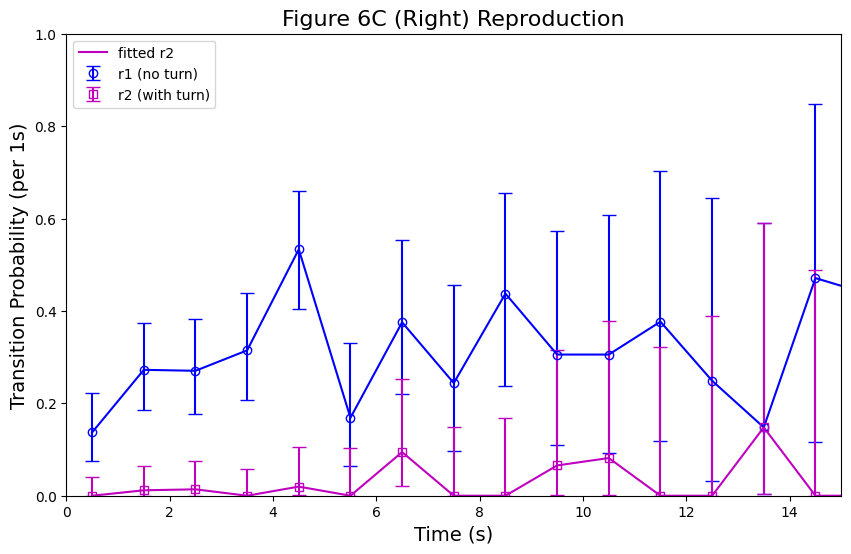

In [62]:
from os import pipe2
from scipy.optimize import curve_fit
from scipy.special import erfi  # 导入 erfi (虚误差函数)
from statsmodels.stats.proportion import proportion_confint
import warnings
turn_reversal = df_6C_up[df_6C_up['turn'] == 1]['reversal duration_yaml']
no_turn = df_6C_up[df_6C_up['turn'] == 0]['reversal duration_yaml']
#定义bins
bin_width = 1  #Δt = 0.5
max_time = np.ceil(max(turn_reversal.max(),no_turn.max()))
bins2 = np.arange(0, max_time+ bin_width, bin_width)

bin_starts = bins2[:-1]
bin_centers = bin_starts + (bin_width/2)

#定义分子与分母的各项
  #用histogram命令选取每个bin中完成的reversal的个数
n_forward_i, _ = np.histogram(no_turn, bins=bins2)
n_turn_i, _ = np.histogram(turn_reversal, bins=bins2)
  #获得所有reversal的实验次数作为分母
total_reversals = pd.concat([turn_reversal, no_turn])

  #定义S_i，在这里我们要选取在bin=0.5s内的回退的次数，通过建立一个统计分布，我们就可以在任意选出的时间t，计算下一个t+bin的时刻发生转换的概率
S_i_total = []
for t_start in bin_starts:
  hit = np.sum(total_reversals >= t_start) #用了一个广播比较来输出S_i(通过把all_reversals中的每一个项与每一次取出来的t_starts比较，输出bool值，让后将True = 1，False = 0，求和)
  S_i_total.append(hit)

S_i_total = np.array(S_i_total)

##计算转换率r1和r2，这里我们根据matlab代码中的处理方法，把被除数从公式中的Δt*Si换为Si，因为我们是从离散的数据中来拟合公式的，只能用这种经验式的处理方法
p_r1 =np.divide(n_forward_i,S_i_total,
              out = np.zeros_like(n_forward_i,dtype = float),
              where=S_i_total!=0)
p_r2 =np.divide(n_turn_i,S_i_total,
              out = np.zeros_like(n_turn_i,dtype = float),
              where=S_i_total!=0)
err_forw_low_05, err_forw_high_05 = proportion_confint(n_forward_i, S_i_total, method='beta')
err_turn_low_05, err_turn_high_05 = proportion_confint(n_turn_i, S_i_total, method='beta')
def convert_p05_to_p1(p):
  return 2*p - p**2
y_plot_r1_data = convert_p05_to_p1(p_r1)
y_plot_r2_data = convert_p05_to_p1(p_r2)
##转换误差棒
ci_forw_low_1s = convert_p05_to_p1(err_forw_low_05)
ci_forw_high_1s = convert_p05_to_p1(err_forw_high_05)
ci_turn_low_1s = convert_p05_to_p1(err_turn_low_05)
ci_turn_high_1s = convert_p05_to_p1(err_turn_high_05)
y_err_r1_low = np.abs(y_plot_r1_data - ci_forw_low_1s)
y_err_r1_high = np.abs(ci_forw_high_1s - y_plot_r1_data)
y_err_r2_low =np.abs(y_plot_r2_data - ci_turn_low_1s)
y_err_r2_high = np.abs(ci_turn_high_1s - y_plot_r2_data)
##转换拟合曲线
plt.figure(figsize=(10, 6))

# 绘制 r1 (no turn)
plt.errorbar(bin_centers, y_plot_r1_data, yerr=[y_err_r1_low, y_err_r1_high],
             fmt='bo', label='r1 (no turn)',
             markerfacecolor='none', capsize=5)

# 绘制 r2 (with turn)
plt.errorbar(bin_centers, y_plot_r2_data, yerr=[y_err_r2_low, y_err_r2_high],
             fmt='ms', label='r2 (with turn)',
             markerfacecolor='none', capsize=5)

# 绘制拟合曲线
plt.plot(bin_centers, y_plot_r1_data, 'b-', label='_nolegend_') # 蓝色实线
plt.plot(bin_centers, y_plot_r2_data, 'm-', label='fitted r2') # 粉色实线

# 美化图表
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Transition Probability (per 1s)', fontsize=14)
plt.title('Figure 6C (Right) Reproduction', fontsize=16)
plt.legend(loc='upper left')
plt.ylim(0, 1.0)
plt.xlim(0, 15)
plt.grid(False) # 关闭网格

plt.show()

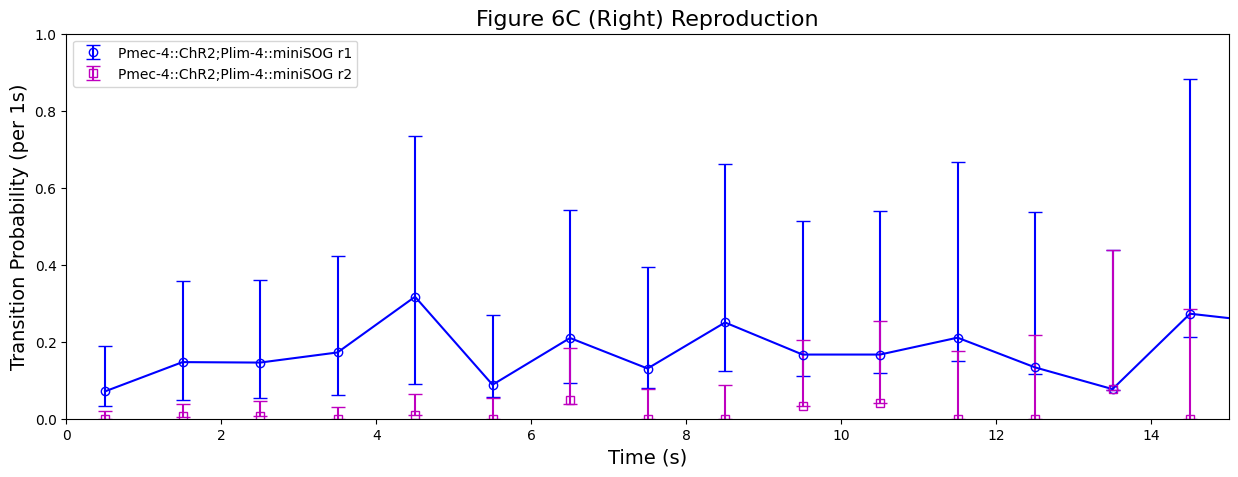

In [83]:
from os import pipe2
from scipy.optimize import curve_fit
from scipy.special import erfi  # 导入 erfi (虚误差函数)
from statsmodels.stats.proportion import proportion_confint
import warnings
turn_reversal = df_6C_up[df_6C_up['turn'] ==1]['reversal duration_yaml']
no_turn = df_6C_up[df_6C_up['turn'] == 0]['reversal duration_yaml']
#定义bins
bin_width = 1  #Δt = 0.5
max_time = np.ceil(max(turn_reversal.max(),no_turn.max()))
bins2 = np.arange(0, max_time+ bin_width, bin_width)

bin_starts = bins2[:-1]
bin_centers = bin_starts + (bin_width/2)

#定义分子与分母的各项
  #用histogram命令选取每个bin中完成的reversal的个数
n_forward_i, _ = np.histogram(no_turn, bins=bins2)
n_turn_i, _ = np.histogram(turn_reversal, bins=bins2)
  #获得所有reversal的实验次数作为分母
total_reversals = pd.concat([turn_reversal, no_turn])

  #定义S_i，在这里我们要选取在bin=0.5s内的回退的次数，通过建立一个统计分布，我们就可以在任意选出的时间t，计算下一个t+bin的时刻发生转换的概率
S_i_total = []
for t_start in bin_starts:
  hit = np.sum(total_reversals >= t_start) #用了一个广播比较来输出S_i(通过把all_reversals中的每一个项与每一次取出来的t_starts比较，输出bool值，让后将True = 1，False = 0，求和)
  S_i_total.append(hit)

S_i_total = np.array(S_i_total)

##计算转换率r1和r2，这里我们根据matlab代码中的处理方法，把被除数从公式中的Δt*Si换为Si，因为我们是从离散的数据中来拟合公式的，只能用这种经验式的处理方法
p_r1 =np.divide(n_forward_i,S_i_total,
              out = np.zeros_like(n_forward_i,dtype = float),
              where=S_i_total!=0)
p_r2 =np.divide(n_turn_i,S_i_total,
              out = np.zeros_like(n_turn_i,dtype = float),
              where=S_i_total!=0)
err_forw_low_05, err_forw_high_05 = proportion_confint(n_forward_i, S_i_total, method='beta')
err_turn_low_05, err_turn_high_05 = proportion_confint(n_turn_i, S_i_total, method='beta')
# def convert_p05_to_p1(p):
#   return 2*p - p**2
# y_plot_r1_data = convert_p05_to_p1(p_r1)
# y_plot_r2_data = convert_p05_to_p1(p_r2)
# ##转换误差棒
# ci_forw_low_1s = convert_p05_to_p1(err_forw_low_05)
# ci_forw_high_1s = convert_p05_to_p1(err_forw_high_05)
# ci_turn_low_1s = convert_p05_to_p1(err_turn_low_05)
# ci_turn_high_1s = convert_p05_to_p1(err_turn_high_05)
# y_err_r1_low = np.abs(y_plot_r1_data - ci_forw_low_1s)
# y_err_r1_high = np.abs(ci_forw_high_1s - y_plot_r1_data)
# y_err_r2_low =np.abs(y_plot_r2_data - ci_turn_low_1s)
# y_err_r2_high = np.abs(ci_turn_high_1s - y_plot_r2_data)
# ##转换拟合曲线
plt.figure(figsize=(15, 5))

# 绘制 r1 (no turn)
plt.errorbar(bin_centers, p_r1, yerr=[err_forw_low_05, err_forw_high_05],
             fmt='bo', label='Pmec-4::ChR2;Plim-4::miniSOG r1',
             markerfacecolor='none', capsize=5)

# 绘制 r2 (with turn)
plt.errorbar(bin_centers, p_r2, yerr=[err_turn_low_05, err_turn_high_05],
             fmt='ms', label='Pmec-4::ChR2;Plim-4::miniSOG r2',
             markerfacecolor='none', capsize=5)

# 绘制拟合曲线
plt.plot(bin_centers, p_r1, 'b-', label='_no_legend_') # 蓝色实线

# 美化图表
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Transition Probability (per 1s)', fontsize=14)
plt.title('Figure 6C (Right) Reproduction', fontsize=16)
plt.legend(loc='upper left')
plt.ylim(0, 1.0)
plt.xlim(0, 15)
plt.grid(False) # 关闭网格

plt.show()

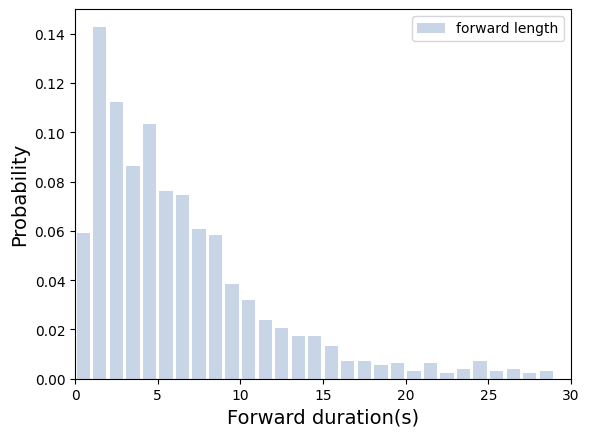

In [94]:
forward_duration =df_6C_bottom['forward duration']
bins = np.arange(0, 30, 1)
myalpha = 0.7
rwidth = 0.8
plt.hist(forward_duration, bins=bins,
         label='forward length',
         color='lightsteelblue',
         alpha=myalpha,
         rwidth=rwidth,
         density=True)

plt.xlabel('Forward duration(s)',fontsize = 14)
plt.ylabel('Probability',fontsize = 14)
plt.legend()
plt.ylim(0,0.15)
plt.xlim(0,30)
plt.show()

In [100]:
forward_duration =df_6C_bottom['forward duration']
from os import pipe2
from scipy.optimize import curve_fit
from scipy.special import erfi
from statsmodels.stats.proportion import proportion_confint
import warnings
#定义bins
bin_width = 1  #Δt = 0.5
max_timeb =forward_duration.max()
binsb = np.arange(0, max_time+ bin_width, bin_width)

bin_starts_b = binsb[:-1]
bin_centers_b = bin_starts_b + (bin_width/2)

#定义分子与分母的各项
  #用histogram命令选取每个bin中完成的reversal的个数
n_forwardb_i, _ = np.histogram(forward_duration, bins=binsb)
  #获得所有reversal的实验次数作为分母
total_forwards = pd.concat([forward_duration])

  #定义S_i，在这里我们要选取在bin=0.5s内的回退的次数，通过建立一个统计分布，我们就可以在任意选出的时间t，计算下一个t+bin的时刻发生转换的概率
S_i_total_b = []
for t_start in bin_starts:
  hit = np.sum(total_forwards >= t_start) #用了一个广播比较来输出S_i(通过把all_reversals中的每一个项与每一次取出来的t_starts比较，输出bool值，让后将True = 1，False = 0，求和)
  S_i_total_b.append(hit)

S_i_total_b = np.array(S_i_total_b)

##计算转换率r1和r2，这里我们根据matlab代码中的处理方法，把被除数从公式中的Δt*Si换为Si，因为我们是从离散的数据中来拟合公式的，只能用这种经验式的处理方法
p_forward =np.divide(n_forwardb_i,S_i_total_b,
              out = np.zeros_like(n_forwardb_i,dtype = float),
              where=S_i_total_b!=0)
err_forwb_low_05, err_forwb_high_05 = proportion_confint(n_forwardb_i, S_i_total_b, method='beta')

plt.figure(figsize=(15, 5))


plt.errorbar(bin_centers_b, p_forward, yerr=[err_forwb_low_05, err_forwb_high_05],
             fmt='bs', label='experimental',
             markerfacecolor='none', capsize=5)
# 绘制拟合曲线
plt.plot(bin_centers_b, p_forward, 'b-', label='_nolegend_') # 蓝色实线

# 美化图表
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Transition Probability (per 1s)', fontsize=14)
plt.title('Figure 6C (Right) Reproduction', fontsize=16)
plt.legend(loc='upper left')
plt.ylim(0, 0.5)
plt.xlim(0, 15)
plt.grid(False) # 关闭网格
plt.show()
###这里的误差棒非常巨大，应该是数据量的不同。

ValueError: operands could not be broadcast together with shapes (29,) (26,) (29,) (26,) 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

try:
    # 1. 计算总试验次数 N (即 t=0 时的存活数)
    #    我们可以用 len(total_reversals) 或 S_i_total[0]
    total_N = len(total_reversals)

    if total_N == 0:
        print("错误: 'total_reversals' 为空。请先运行上面的数据处理单元。")
    else:
        # 2. 计算 "存活比例" (Y 轴)
        survival_proportion = S_i_total / total_N

        # 3. 创建一个新的、尺寸适合插图的画布
        plt.figure(figsize=(5, 3)) # 5x3 英寸

        # 4. 绘制生存曲线
        #    plt.step() (阶梯图) 是绘制生存函数最标准的方法
        #    where='post' 意味着在 t 到 t+1 期间，值保持在 t 时刻的水平
        plt.step(bin_starts, survival_proportion, where='post', label='Survival Function (Data)')

        # (如果您不喜欢阶梯图，也可以用 plt.plot(bin_starts, survival_proportion)
        #  来画一条平滑的折线)

        # 5. 美化图表
        plt.title('Figure 6C Inset - Survival Function')
        plt.xlabel('Time (s)')
        plt.ylabel('Proportion Surviving (P(T ≥ t))')

        # 6. 设置坐标轴范围
        plt.ylim(0, 1.05) # Y 轴从 0 到 1
        plt.xlim(left=0)  # X 轴从 0 开始

        plt.grid(True, linestyle='--', alpha=0.5) # 添加淡淡的网格
        plt.show()

except NameError as e:
    print(f"错误: 必需的变量未定义: {e}")
    print("请确保您已经成功运行了上面的数据准备单元格。")

指数衰减拟合结果 (P(t) = A * e^(-k*t)):
  直线斜率 (m): -0.2152
  衰减常数 (k = -m): 0.2152
  半衰期 (Half-Life): 3.22 秒


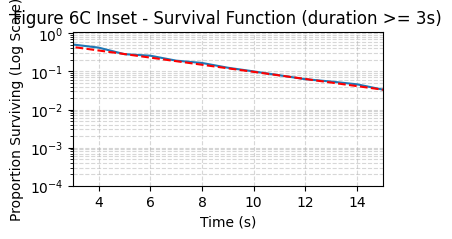

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# # 从筛选后的数据中重新定义 turn 和 no_turn
# turn_reversal_inset = df_6C_up_filtered[df_6C_up_filtered['turn'] ==1]['reversal duration_yaml']
# no_turn_inset = df_6C_up_filtered[df_6C_up_filtered['turn'] == 0]['reversal duration_yaml']

# total_reversals_filtered 现在是所有 >= 3s 的试验
total_reversals_filtered = pd.concat([turn_reversal, no_turn])


bin_width = 1
# 如果筛选后没有数据，则设置一个默认值避免报错
if not total_reversals_filtered.empty:
    max_time = np.ceil(total_reversals_filtered.max())
    # bins2 现在从0开始
    bins3 = np.arange(0, max_time + bin_width, bin_width)
    bin_starts = bins3[:-1]


# 重新计算 S_i (生存函数计数)
if not total_reversals_filtered.empty:
    S_i_total = []
    for t_start in bin_starts:
        # S_i 的定义不变：在 t 时刻，还有多少事件在持续
        hit = np.sum(total_reversals_filtered >= t_start)
        S_i_total.append(hit)
    S_i_total = np.array(S_i_total)


#计算总试验次数 N (这是筛选后的总数)
total_N = len(df_6C_up)
filter_time_up = 3
if total_N > 0:
    # 2. 计算 "存活比例" (Y 轴)
    survival_proportion = S_i_total / total_N
    ####进行拟合
    valid_indices = (survival_proportion > 0)&(bin_starts >= filter_time_up)
    x_data_fit = bin_starts[valid_indices]
    y_data_fit = survival_proportion[valid_indices]

    # 将 Y 轴数据转换为对数
    y_log_fit = np.log(y_data_fit) # 使用自然对数 (ln)

    # 2. 执行线性拟合
    # np.polyfit(x, y, 1) 返回 [斜率 m, 截距 b]
    slope, intercept = np.polyfit(x_data_fit, y_log_fit, 1)

    decay_rate_k = -slope
    half_life = np.log(2) / decay_rate_k


    print("指数衰减拟合结果 (P(t) = A * e^(-k*t)):")
    print(f"  直线斜率 (m): {slope:.4f}")
    print(f"  衰减常数 (k = -m): {decay_rate_k:.4f}")
    print(f"  半衰期 (Half-Life): {half_life:.2f} 秒")

    y_log_plot = slope * bin_starts + intercept

    # 将拟合线从对数空间转换回线性空间
    y_fit_plot = np.exp(y_log_plot)


    # 创建画布
    plt.figure(figsize=(4, 2))

    # 绘制生存曲线和拟合曲线
    plt.plot(bin_starts, survival_proportion)
    plt.plot(bin_starts, y_fit_plot, 'r--',
             label=f'Exponential Fit (k={decay_rate_k:.3f})')

    # 设置 Y 轴为对数标尺
    plt.yscale('log')

    # 美化图表
    plt.title('Figure 6C Inset - Survival Function (duration >= 3s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Proportion Surviving (Log Scale)')

    #  设置坐标轴范围
    plt.ylim(bottom=0.0001, top=1.1)
    plt.xlim(3,15) # X 轴现在从 3 开始

    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.show()

指数衰减拟合结果 (Bottom Plot):
  直线斜率 (m): -0.0870
  衰减常数 (k = -m): 0.0870
  半衰期 (Half-Life): 7.97 秒


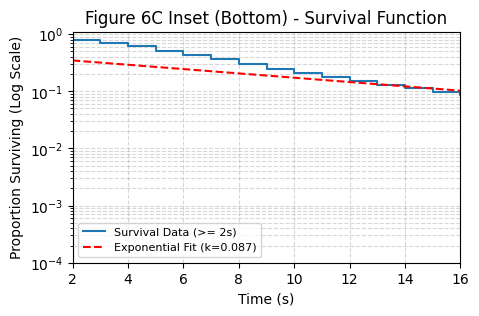

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  绘制 Figure 6C Inset (Bottom) - Survival Function

try:
    forward_duration_bo = df_6C_bottom['forward duration']


    # 定义 'bo' 变量
    bin_width_bo = 1

    if not forward_duration_bo.empty:
        max_time_bo = np.ceil(forward_duration_bo.max())
        # 我们的分箱现在从 0s 开始
        bins_bo = np.arange(0, max_time_bo + bin_width_bo, bin_width_bo)
        bin_starts_bo = bins_bo[:-1]

    # 重新计算 S_i (生存函数计数)
    if not forward_duration_bo.empty:
        S_i_total_bo = []
        for t_start in bin_starts_bo:
            hit = np.sum(forward_duration_bo >= t_start)
            S_i_total_bo.append(hit)
        S_i_total_bo = np.array(S_i_total_bo)


    # 计算总试验次数 N (筛选后的总数)
    total_N_bo = len(forward_duration_bo)

    if total_N_bo > 0:
        # 计算 "存活比例"
        survival_proportion_bo = S_i_total_bo / total_N_bo

        # 准备拟合数据
        filter_start_time = 2
        valid_indices_bo = (survival_proportion_bo > 0) & (bin_starts_bo >= filter_start_time)
        x_data_fit_bo = bin_starts_bo[valid_indices_bo]
        y_data_fit_bo = survival_proportion_bo[valid_indices_bo]
        y_log_fit_bo = np.log(y_data_fit_bo) # 自然对数

        # 执行线性拟合
        slope_bo, intercept_bo = np.polyfit(x_data_fit_bo, y_log_fit_bo, 1)

        decay_rate_k_bo = -slope_bo
        half_life_bo = np.log(2) / decay_rate_k_bo

        print("指数衰减拟合结果 (Bottom Plot):")
        print(f"  直线斜率 (m): {slope_bo:.4f}")
        print(f"  衰减常数 (k = -m): {decay_rate_k_bo:.4f}")
        print(f"  半衰期 (Half-Life): {half_life_bo:.2f} 秒")

        # 准备绘图的拟合线
        y_log_plot_bo = slope_bo * bin_starts_bo + intercept_bo
        y_fit_plot_bo = np.exp(y_log_plot_bo)

        # 绘图
        plt.figure(figsize=(5, 3))

        plt.step(bin_starts_bo, survival_proportion_bo, where='post', label='Survival Data (>= 2s)')
        plt.plot(bin_starts_bo, y_fit_plot_bo, 'r--',
                 label=f'Exponential Fit (k={decay_rate_k_bo:.3f})')

        plt.yscale('log') # 设置 Y 轴为对数标尺

        plt.title('Figure 6C Inset (Bottom) - Survival Function')
        plt.xlabel('Time (s)')
        plt.ylabel('Proportion Surviving (Log Scale)')

        plt.ylim(bottom=0.0001, top=1.1)
        plt.xlim(2,16) # X 轴从 2s 开始

        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.legend(fontsize=8)
        plt.show()

except Exception as e:
    print(f"发生了一个未知错误: {e}")